I looked at the formal error of the ICRF catalog and Gaia DR2 to see if the formal errors are Gaussian-like.

Read these ICRF catalogs from data files.

In [1]:
# ICRF catalog
import numpy as np

# My modules
from my_progs.catalog.read_icrf import read_icrf1, read_icrf2, read_icrf3

In [2]:
# ICRF1 catalog
icrf1 = read_icrf1()

# ICRF2 catalog
icrf2 = read_icrf2()

# ICRF3 S/X catalog
icrf3sx = read_icrf3(wv="sx")

# ICRF3 K catalog
icrf3k = read_icrf3(wv="k")

# ICRF3 X/Ka catalog
icrf3xka = read_icrf3(wv="xka")

Then I plot the formal against the number of observed delay and number of observed sessions.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

For ICRF1 catalog, there are three classifications of sources:

1. Defining
2. Candidates
3. Other


In [4]:
mask1 = icrf1["type"] == "D"
mask2 = icrf1["type"] == "C"
mask3 = icrf1["type"] == "O"

icrf1_def = icrf1[mask1]
icrf1_can = icrf1[mask2]
icrf1_oth = icrf1[mask3]

For ICRF2 catalog, there are also three classifications of sources:

1. Defining
2. VCS-only
3. Non-VCS


In [5]:
mask1 = icrf2["type"] == "D"
mask2 = icrf2["type"] == "V"
mask3 = icrf2["type"] == "N"

icrf2_def = icrf2[mask1]
icrf2_vcs = icrf2[mask2]
icrf2_non = icrf2[mask3]

For ICRF3 catalog, there are only two classifications of sources:

1. Defining
2. Other


In [6]:
mask1 = icrf3sx["type"] == "D"
mask2 = icrf3sx["type"] != "D"

icrf3sx_def = icrf3sx[mask1]
icrf3sx_oth = icrf3sx[mask2]

In [7]:
mask1 = icrf3k["type"] == "D"
mask2 = icrf3k["type"] != "D"

icrf3k_def = icrf3k[mask1]
icrf3k_oth = icrf3k[mask2]

In [8]:
mask1 = icrf3xka["type"] == "D"
mask2 = icrf3xka["type"] != "D"

icrf3xka_def = icrf3xka[mask1]
icrf3xka_oth = icrf3xka[mask2]

As for Gaia Data release 2, what would happen?

In [9]:
from astropy.table import Table

dr2_file = ("/Users/Neo/Astronomy/data/catalogs/"
            "gaia/dr2/gaiadr2_iers.fits")


gdr2 = Table.read(dr2_file)

from my_progs.catalog.pos_err import pos_err_calc
pos_err = pos_err_calc(
        gdr2["ra_error"], gdr2["dec_error"], gdr2["ra_dec_corr"])

from astropy import units as u
gdr2.add_column(pos_err, name="pos_err", index=6)
gdr2["pos_err"].unit = u.mas

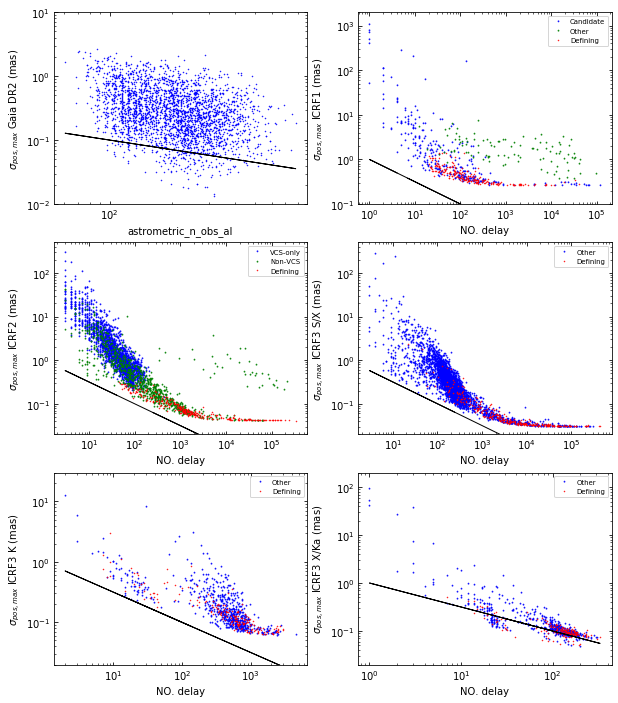

In [10]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(
    figsize=(10, 12), ncols=2, nrows=3)

# Gaia DR2
ax0.plot(gdr2["astrometric_n_obs_al"], gdr2["pos_err"], "b.", ms=1)

ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.set_ylabel("$\\sigma_{pos,max}$ Gaia DR2 (mas)")
ax0.set_xlabel("astrometric_n_obs_al")

# Gaussian-like formal
y = 1 / np.sqrt(gdr2["astrometric_n_obs_al"])
ax0.plot(gdr2["astrometric_n_obs_al"], y, "k-", label="", lw=1)

ax0.set_ylim([0.01, 10])
ax0.yaxis.set_ticks_position("both")
ax0.xaxis.set_ticks_position("both")

# ICRF1
ax1.plot(icrf1_can["nb_del"], icrf1_can["pos_err"], "bv", label="Candidate", ms=1)
ax1.plot(icrf1_oth["nb_del"], icrf1_oth["pos_err"], "g^", label="Other", ms=1)
ax1.plot(icrf1_def["nb_del"], icrf1_def["pos_err"], "r.", label="Defining", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(icrf1["nb_del"])
ax1.plot(icrf1["nb_del"], y, "k-", label="", lw=1)

ax1.set_yscale("log")
ax1.set_xscale("log")
# ax1.set_xlabel("N$_{delay}$")
ax1.set_ylim([0.1, 2000])
ax1.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.legend(fontsize="x-small")
# ax1.text(100, 800, "ICRF1")
ax1.set_ylabel("$\\sigma_{pos,max}$ ICRF1 (mas)")
ax1.set_xlabel("NO. delay")

# ICRF2
ax2.plot(icrf2_vcs["nb_del"], icrf2_vcs["pos_err"], "bv", label="VCS-only", ms=1)
ax2.plot(icrf2_non["nb_del"], icrf2_non["pos_err"], "g^", label="Non-VCS", ms=1)
ax2.plot(icrf2_def["nb_del"], icrf2_def["pos_err"], "r.", label="Defining", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(icrf2["nb_del"])
ax2.plot(icrf2["nb_del"], y, "k-", label="", lw=1)

ax2.set_yscale("log")
ax2.set_xscale("log")
# ax2.set_xlabel("N$_{delay}$")
ax2.set_ylim([0.02, 500])
ax2.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.legend(fontsize="x-small")

ax2.set_ylabel("$\\sigma_{pos,max}$ ICRF2 (mas)")
ax2.set_xlabel("NO. delay")

# ICRF3 SX
ax3.plot(icrf3sx_oth["nb_del"], icrf3sx_oth["pos_err"], "b^", label="Other", ms=1)
ax3.plot(icrf3sx_def["nb_del"], icrf3sx_def["pos_err"], "r.", label="Defining", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(icrf3sx["nb_del"])
ax3.plot(icrf3sx["nb_del"], y, "k-", label="", lw=1)

ax3.set_ylim([0.02, 500])

ax3.set_yscale("log")
ax3.set_xscale("log")
# ax3.set_xlabel("N$_{delay}$")
ax3.yaxis.set_ticks_position("both")
ax3.xaxis.set_ticks_position("both")
ax3.legend(fontsize="x-small")

ax3.set_ylabel("$\\sigma_{pos,max}$ ICRF3 S/X (mas)")
ax3.set_xlabel("NO. delay")

# ICRF3 K
ax4.plot(icrf3k_oth["nb_del"], icrf3k_oth["pos_err"], "b^", label="Other", ms=1)
ax4.plot(icrf3k_def["nb_del"], icrf3k_def["pos_err"], "r.", label="Defining", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(icrf3k["nb_del"])
ax4.plot(icrf3k["nb_del"], y, "k-", label="", lw=1)

ax4.set_ylim([0.02, 30])
ax4.set_yscale("log")
ax4.set_xscale("log")
# ax4.set_xlabel("N$_{delay}$")
ax4.yaxis.set_ticks_position("both")
ax4.xaxis.set_ticks_position("both")
ax4.legend(fontsize="x-small")

ax4.set_ylabel("$\\sigma_{pos,max}$ ICRF3 K (mas)")
ax4.set_xlabel("NO. delay")

# ICRF3 XKa
ax5.plot(icrf3xka_oth["nb_del"], icrf3xka_oth["pos_err"], "b^", label="Other", ms=1)
ax5.plot(icrf3xka_def["nb_del"],
         icrf3xka_def["pos_err"], "r.", label="Defining", ms=1)


# Gaussian-like formal
y = 1 / np.sqrt(icrf3xka["nb_del"])
ax5.plot(icrf3xka["nb_del"], y, "k-", label="", lw=1)

ax5.set_ylim([0.02, 200])
ax5.set_yscale("log")
ax5.set_xscale("log")
# ax5.set_xlabel("N$_{delay}$")
ax5.yaxis.set_ticks_position("both")
ax5.xaxis.set_ticks_position("both")
ax5.legend(fontsize="x-small")

ax5.set_ylabel("$\\sigma_{pos,max}$ ICRF3 X/Ka (mas)")
ax5.set_xlabel("NO. delay")

plt.subplots_adjust()

Another way to group sources is to divide them into two groups: south and north.

In [11]:
icrf1_nor = icrf1[icrf1["dec"] >= 0]
icrf1_sou = icrf1[icrf1["dec"] < 0]

icrf2_nor = icrf2[icrf2["dec"] >= 0]
icrf2_sou = icrf2[icrf2["dec"] < 0]

icrf3sx_nor = icrf3sx[icrf3sx["dec"] >= 0]
icrf3sx_sou = icrf3sx[icrf3sx["dec"] < 0]

icrf3k_nor = icrf3k[icrf3k["dec"] >= 0]
icrf3k_sou = icrf3k[icrf3k["dec"] < 0]

icrf3xka_nor = icrf3xka[icrf3xka["dec"] >= 0]
icrf3xka_sou = icrf3xka[icrf3xka["dec"] < 0]

gdr2_nor = gdr2[gdr2["dec"] >= 0]
gdr2_sou = gdr2[gdr2["dec"] < 0]

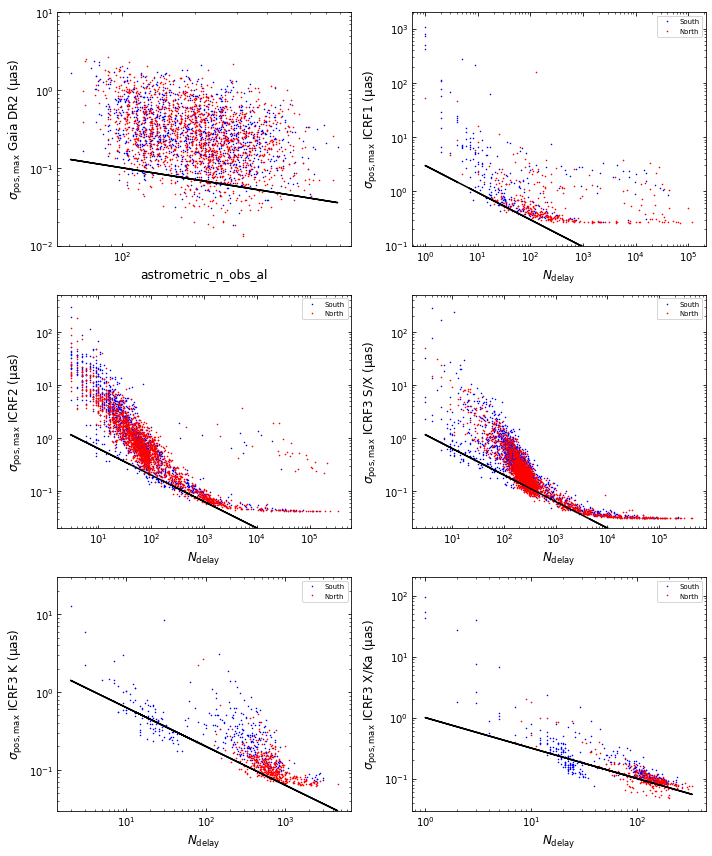

In [12]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(
    figsize=(10, 12), ncols=2, nrows=3)

# Gaia DR2
ax0.plot(gdr2_sou["astrometric_n_obs_al"], gdr2_sou["pos_err"], "b*", label="South", ms=1)
ax0.plot(gdr2_nor["astrometric_n_obs_al"], gdr2_nor["pos_err"], "rx", label="North", ms=1)

ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ Gaia DR2 ($\\mathrm{\\mu as}$)", fontsize=12)
ax0.set_xlabel("astrometric_n_obs_al", fontsize=12)

# Gaussian-like formal
y = 1 / np.sqrt(gdr2["astrometric_n_obs_al"])
ax0.plot(gdr2["astrometric_n_obs_al"], y, "k-", label="")

ax0.set_ylim([0.010, 10])
ax0.yaxis.set_ticks_position("both")
ax0.xaxis.set_ticks_position("both")

# ICRF1
ax1.plot(icrf1_sou["nb_del"], icrf1_sou["pos_err"], "b*", label="South", ms=1)
ax1.plot(icrf1_nor["nb_del"], icrf1_nor["pos_err"], "rx", label="North", ms=1)

# Gaussian-like formal
y = 3 / np.sqrt(icrf1["nb_del"])
ax1.plot(icrf1["nb_del"], y, "k-", label="")

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim([0.1, 2000])
ax1.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.legend(fontsize="x-small")
# ax1.text(100, 800, "ICRF1")
ax1.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF1 ($\\mathrm{\\mu as}$)", fontsize=12)
ax1.set_xlabel("$N_{\\rm delay}$", fontsize=12)

# ICRF2
ax2.plot(icrf2_sou["nb_del"], icrf2_sou["pos_err"], "b*", label="South", ms=1)
ax2.plot(icrf2_nor["nb_del"], icrf2_nor["pos_err"], "rx", label="North", ms=1)

# Gaussian-like formal
y = 2 / np.sqrt(icrf2["nb_del"])
ax2.plot(icrf2["nb_del"], y, "k-", label="")

ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylim([0.02, 500])
ax2.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.legend(fontsize="x-small")

ax2.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF2 ($\\mathrm{\\mu as}$)", fontsize=12)
ax2.set_xlabel("$N_{\\rm delay}$", fontsize=12)

# ICRF3 SX
ax3.plot(icrf3sx_sou["nb_del"], icrf3sx_sou["pos_err"], "b*", label="South", ms=1)
ax3.plot(icrf3sx_nor["nb_del"], icrf3sx_nor["pos_err"], "rx", label="North", ms=1)

# Gaussian-like formal
y = 2 / np.sqrt(icrf3sx["nb_del"])
ax3.plot(icrf3sx["nb_del"], y, "k-", label="")

ax3.set_ylim([0.02, 500])

ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.yaxis.set_ticks_position("both")
ax3.xaxis.set_ticks_position("both")
ax3.legend(fontsize="x-small")

ax3.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF3 S/X ($\\mathrm{\\mu as}$)", fontsize=12)
ax3.set_xlabel("$N_{\\rm delay}$", fontsize=12)

# ICRF3 K
ax4.plot(icrf3k_sou["nb_del"], icrf3k_sou["pos_err"], "b*", label="South", ms=1)
ax4.plot(icrf3k_nor["nb_del"], icrf3k_nor["pos_err"], "rx", label="North", ms=1)

# Gaussian-like formal
y = 2 / np.sqrt(icrf3k["nb_del"])
ax4.plot(icrf3k["nb_del"], y, "k-", label="")

ax4.set_ylim([0.03, 30])
ax4.set_yscale("log")
ax4.set_xscale("log")
ax4.yaxis.set_ticks_position("both")
ax4.xaxis.set_ticks_position("both")
ax4.legend(fontsize="x-small")

ax4.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF3 K ($\\mathrm{\\mu as}$)", fontsize=12)
ax4.set_xlabel("$N_{\\rm delay}$", fontsize=12)

# ICRF3 XKa
ax5.plot(icrf3xka_sou["nb_del"], icrf3xka_sou["pos_err"], "b*", label="South", ms=1)
ax5.plot(icrf3xka_nor["nb_del"],
         icrf3xka_nor["pos_err"], "rx", label="North", ms=1)


# Gaussian-like formal
y = 1 / np.sqrt(icrf3xka["nb_del"])
ax5.plot(icrf3xka["nb_del"], y, "k-", label="")

ax5.set_ylim([0.03, 200])
ax5.set_yscale("log")
ax5.set_xscale("log")
ax5.yaxis.set_ticks_position("both")
ax5.xaxis.set_ticks_position("both")
ax5.legend(fontsize="x-small")

ax5.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF3 X/Ka ($\\mathrm{\\mu as}$)", fontsize=12)
ax5.set_xlabel("$N_{\\rm delay}$", fontsize=12)

plt.tight_layout()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


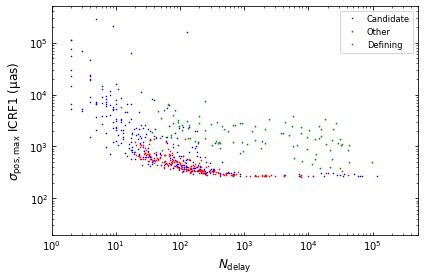

In [31]:
fig, ax1 = plt.subplots()

# ICRF1
ax1.plot(icrf1_can["nb_del"], icrf1_can["pos_err"]*1e3, "b*", label="Candidate", ms=1)
ax1.plot(icrf1_oth["nb_del"], icrf1_oth["pos_err"]*1e3, "g^", label="Other", ms=1)
ax1.plot(icrf1_def["nb_del"], icrf1_def["pos_err"]*1e3, "rx", label="Defining", ms=1)

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim([20, 500000])
ax1.set_xlim([1, 5e5])
ax1.legend(fontsize="small")
# ax1.text(100, 800, "ICRF1")
ax1.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF1 ($\\mathrm{\\mu as}$)", fontsize=12)
ax1.set_xlabel("$N_{\\rm delay}$", fontsize=12)

plt.tight_layout()
plt.savefig("../plots/icrf1-err-vs-nobs.eps", hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


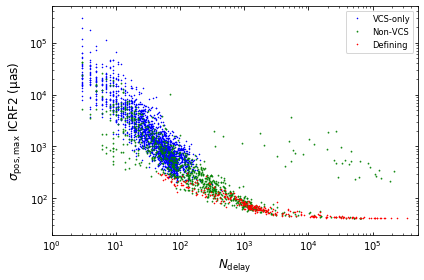

In [32]:
fig, ax2 = plt.subplots()

# ICRF2
ax2.plot(icrf2_vcs["nb_del"], icrf2_vcs["pos_err"]* 1e3, "b*", label="VCS-only", ms=1)
ax2.plot(icrf2_non["nb_del"], icrf2_non["pos_err"]* 1e3, "g^", label="Non-VCS", ms=1)
ax2.plot(icrf2_def["nb_del"], icrf2_def["pos_err"]* 1e3, "rx", label="Defining", ms=1)

ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylim([20, 500000])
ax2.set_xlim([1, 5e5])
ax2.legend(fontsize="small")

ax2.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF2 ($\\mathrm{\\mu as}$)", fontsize=12)
ax2.set_xlabel("$N_{\\rm delay}$", fontsize=12)

plt.tight_layout()
plt.savefig("../plots/icrf2-err-vs-nobs.eps", hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


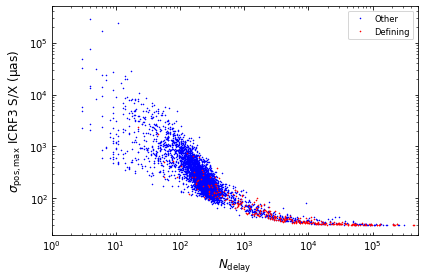

In [33]:
fig, ax3 = plt.subplots()

# ICRF3 SX
ax3.plot(icrf3sx_oth["nb_del"], icrf3sx_oth["pos_err"] * 1e3, "b*", label="Other", ms=1)
ax3.plot(icrf3sx_def["nb_del"], icrf3sx_def["pos_err"] * 1e3, "rx", label="Defining", ms=1)

ax3.set_ylim([20, 500000])
ax3.set_xlim([1, 5e5])

ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.legend(fontsize="small")

ax3.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF3 S/X ($\\mathrm{\\mu as}$)", fontsize=12)
ax3.set_xlabel("$N_{\\rm delay}$", fontsize=12)

plt.tight_layout()
plt.savefig("../plots/icrf3-err-vs-nobs.eps", hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


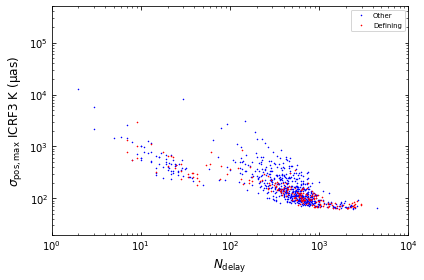

In [34]:
fig, ax4 = plt.subplots()

# ICRF3 K
ax4.plot(icrf3k_oth["nb_del"], icrf3k_oth["pos_err"] * 1e3, "b*", label="Other", ms=1)
ax4.plot(icrf3k_def["nb_del"], icrf3k_def["pos_err"] * 1e3, "rx", label="Defining", ms=1)

ax4.set_ylim([20, 500000])
ax4.set_xlim([1, 1e4])
ax4.set_yscale("log")
ax4.set_xscale("log")
ax4.yaxis.set_ticks_position("both")
ax4.xaxis.set_ticks_position("both")
ax4.legend(fontsize="x-small")

ax4.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF3 K ($\\mathrm{\\mu as}$)", fontsize=12)
ax4.set_xlabel("$N_{\\rm delay}$", fontsize=12)

plt.tight_layout()
plt.savefig("../plots/icrf3k-err-vs-nobs.eps", hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


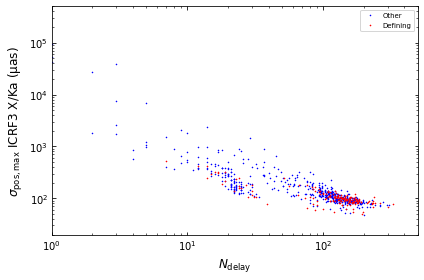

In [42]:
fig, ax5 = plt.subplots()

# ICRF3 XKa
ax5.plot(icrf3xka_oth["nb_del"], icrf3xka_oth["pos_err"] * 1e3, "b*", label="Other", ms=1)
ax5.plot(icrf3xka_def["nb_del"],
         icrf3xka_def["pos_err"] * 1e3, "rx", label="Defining", ms=1)

ax5.set_ylim([20, 500000])
ax5.set_xlim([1, 500])
ax5.set_yscale("log")
ax5.set_xscale("log")
ax5.legend(fontsize="x-small")

ax5.set_ylabel(
    "$\\sigma_{\\rm pos,max}$ ICRF3 X/Ka ($\\mathrm{\\mu as}$)", fontsize=12)
ax5.set_xlabel("$N_{\\rm delay}$", fontsize=12)

plt.tight_layout()
plt.savefig("../plots/icrf3xka-err-vs-nobs.eps", hbox="tight")

(array([ 8., 10., 14., 15., 24., 13.,  9.,  0.,  0.,  2.]),
 array([-81.01728644, -75.45555958, -69.89383273, -64.33210587,
        -58.77037901, -53.20865215, -47.64692529, -42.08519844,
        -36.52347158, -30.96174472, -25.40001786]),
 <a list of 10 Patch objects>)

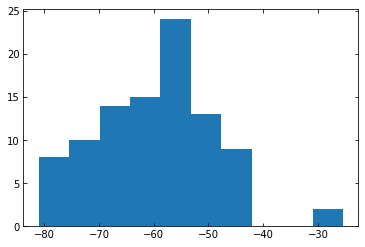

In [13]:
icrf3k_less = icrf3k[icrf3k["nb_del"] <50]

fig, ax = plt.subplots()
ax.hist(icrf3k_less["dec"])

(array([25., 74., 37.,  8., 17.,  8.,  1.,  7.,  2.,  1.]),
 array([-87.19985479, -71.31265079, -55.42544678, -39.53824278,
        -23.65103878,  -7.76383477,   8.12336923,  24.01057324,
         39.89777724,  55.78498125,  71.67218525]),
 <a list of 10 Patch objects>)

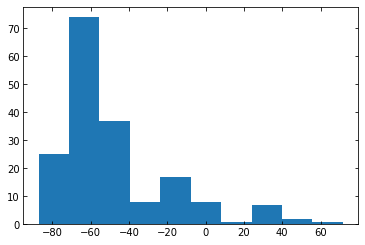

In [14]:
icrf3xka_less = icrf3xka[icrf3xka["nb_del"] <40]

fig, ax = plt.subplots()
ax.hist(icrf3xka_less["dec"])